In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import numpy as np


In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.shape

(200, 5)

In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

C:\Users\meher\AppData\Local\Temp\ipykernel_5160\3000557338.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], bins = 20)
C:\Users\meher\AppData\Local\Temp\ipykernel_5160\3000557338.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], bins = 20)
C:\Users\meher\AppData\Local\Temp\ip

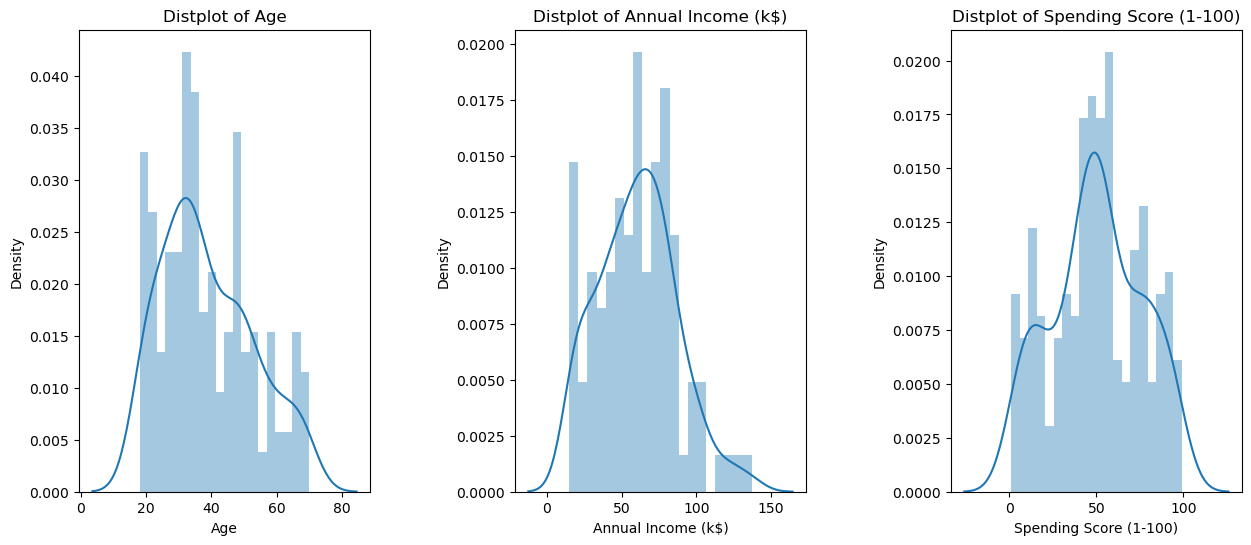

In [9]:
plt.figure(1, figsize=(15 , 6))
n = 0

for i in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[i], bins = 20)
    plt.title("Distplot of {}".format(i))
plt.show()


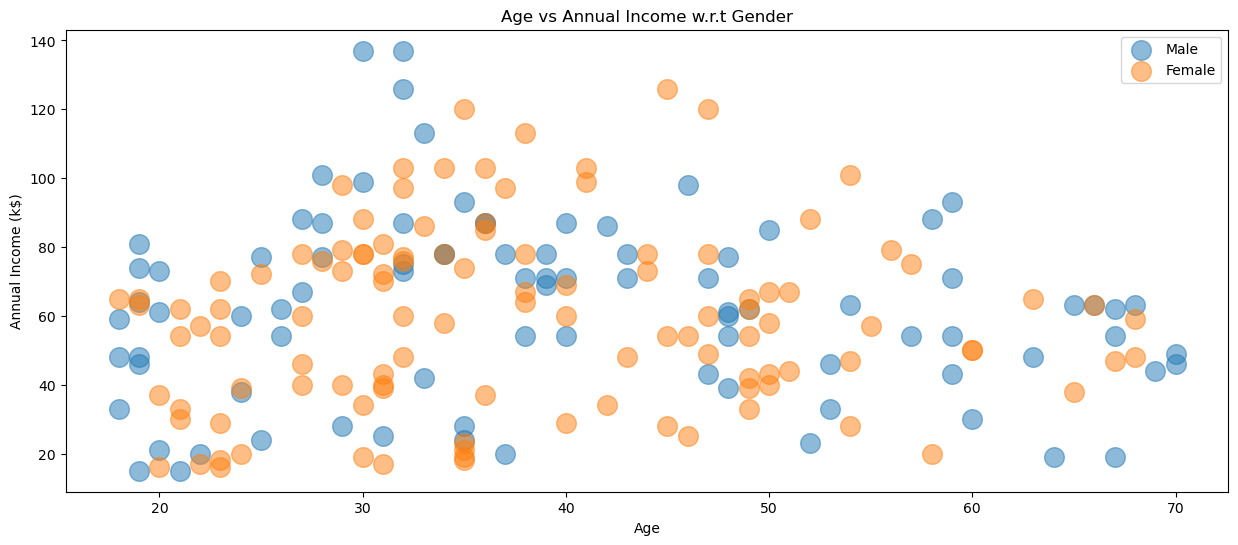

In [10]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()


## Training model 

In [11]:
x = df.iloc[:,[3,4]].values

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\meher\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\meher\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\meher\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\meher\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

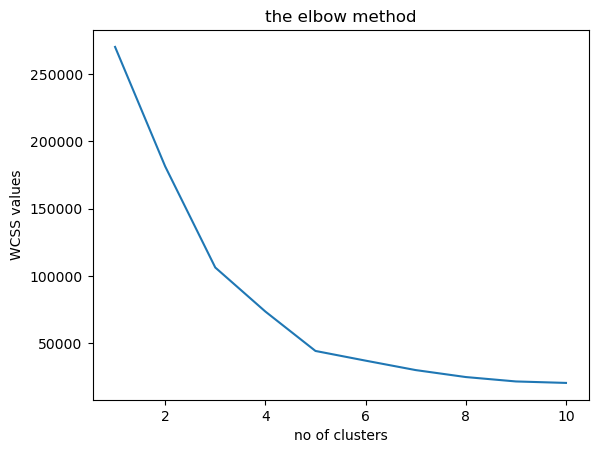

In [13]:
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('WCSS values')
plt.show()

In [14]:
km_model = KMeans(n_clusters=5,init='k-means++',random_state=0)

In [15]:
y_kmeans = km_model.fit_predict(x)

C:\Users\meher\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\meher\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


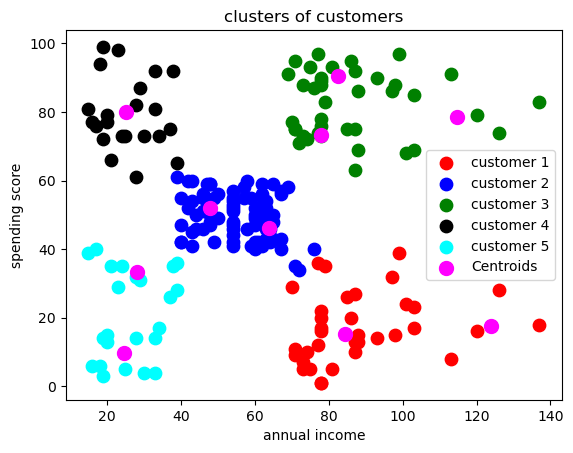

In [17]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1] , s = 80 , c = 'red',label='customer 1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1] , s = 80 , c = 'blue',label='customer 2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1] , s = 80 , c = 'green',label='customer 3')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1] , s = 80 , c = 'black',label='customer 4')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1] , s = 80 , c = 'cyan',label='customer 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s =100,c = 'magenta',label = 'Centroids')
plt.title('clusters of customers')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()